# Botnet Detector

Tutorial: [Profesor Parno](https://www.youtube.com/watch?v=vNVMvepn9NQ&list=PLFMqiVagrzLLvJurUnf0K_ejhTgR70HTO&index=1&ab_channel=ProfesorParno)

## Import modules and datasets

In [3]:
# ML Algorithm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.neighbors import *

# ML Accuracy
from sklearn.metrics import accuracy_score

# Data processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
data_url = "https://raw.githubusercontent.com/sec0nds0n/Botnet-Detector-Dataset/main/network-logs.csv"
df = pd.read_csv(data_url)

In [5]:
df.head()

,REMOTE_PORT,LATENCY,THROUGHPUT,ANOMALY
0,21,15.942875,16.202998,0
1,20,12.666451,15.899084,1
2,80,13.894550,12.958008,0
3,21,13.620813,15.459475,0
4,21,15.705485,15.339565,0


We only use latency and throughput

In [7]:
sample = df.iloc[:, [1,2]].values
target = df['ANOMALY'].values

In [8]:
print("Sample:", len(sample), "\nTarget:", len(target))

Sample: 405 
Target: 405


In [9]:
X_train, X_test, y_train, y_test = train_test_split(sample, target, test_size=0.2, random_state=0)

## Using KNN for making predictions

### n_neighbors = 2

In [10]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)

In [23]:
knn_accuracy = accuracy_score(y_test, knn_predict) * 100
print("Accuracy score with n-2:", knn_accuracy.round(2))

Accuracy score with n-2: 95.06


In [24]:
accuracy_comparison = []
accuracy_comparison.append(knn_accuracy)

## Plotting using decision regions

In [15]:
# !pip install mlxtend

In [17]:
from mlxtend.plotting import plot_decision_regions

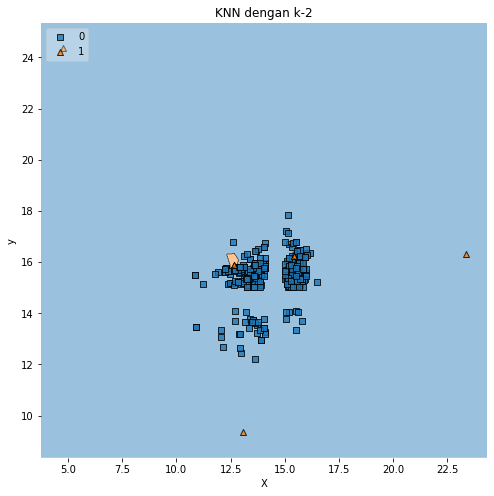

In [20]:
plt.figure(figsize=(8, 8))
plot_decision_regions(X_train, y_train, clf=knn, legend=2)
plt.title("KNN dengan k-2")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Build Simple Function to find each n_neighbours

In [26]:
def knn_builder(n_neighbours):
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)

    # Get the accuracy
    knn_accuracy = accuracy_score(y_test, knn_predict) * 100
    print(f"Accuracy score with n-{n_neighbours}:", knn_accuracy.round(2))
    accuracy_comparison.append(knn_accuracy)

    # Visualize the model
    plt.figure(figsize=(8, 8))
    plot_decision_regions(X_train, y_train, clf=knn, legend=2)
    plt.title(f"KNN dengan k-{n_neighbours}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.show()

### n_neighbours=3

Accuracy score with n-3: 95.06


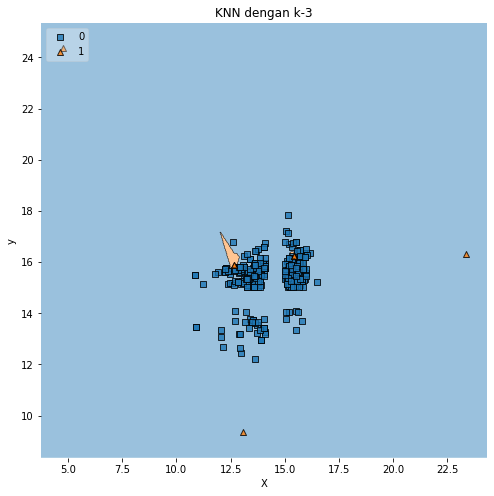

In [27]:
knn_builder(3)

### n_neighbours=4

Accuracy score with n-4: 93.83


C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


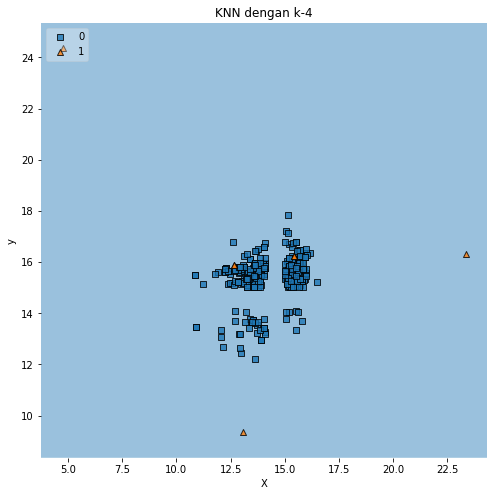

In [29]:
knn_builder(4)

### n_neighbours=5

Accuracy score with n-5: 93.83


C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


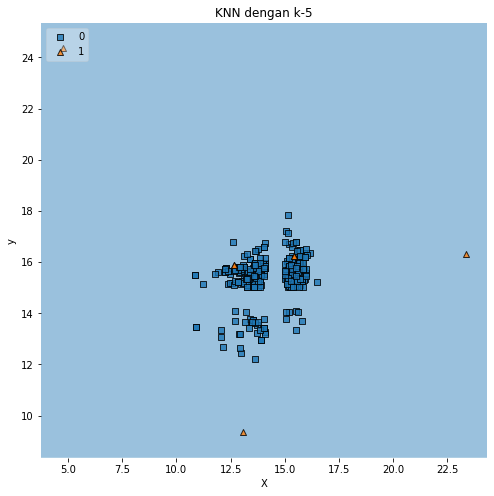

In [30]:
knn_builder(5)

### n_neighbours=6

Accuracy score with n-6: 93.83


C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


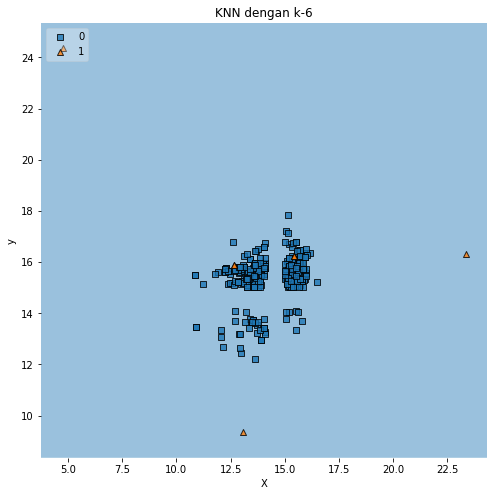

In [31]:
knn_builder(6)

### n_neighbours=7

Accuracy score with n-7: 93.83


C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


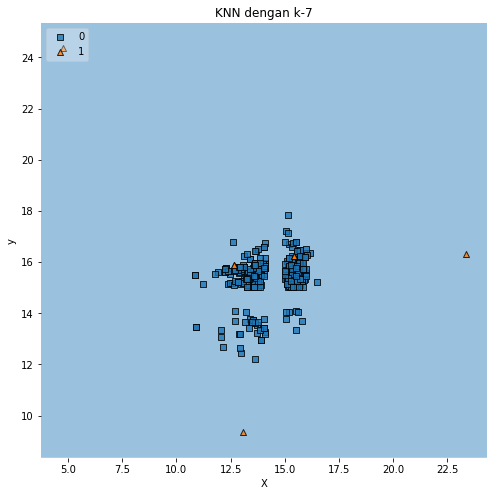

In [32]:
knn_builder(7)

### n_neighbours=8

Accuracy score with n-8: 93.83


C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


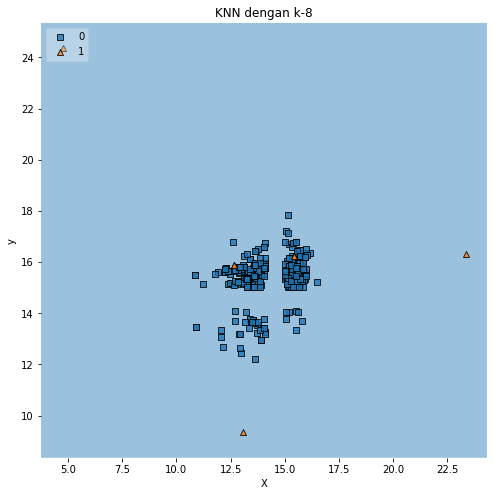

In [33]:
knn_builder(8)

### n_neighbours=9

Accuracy score with n-9: 93.83


C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


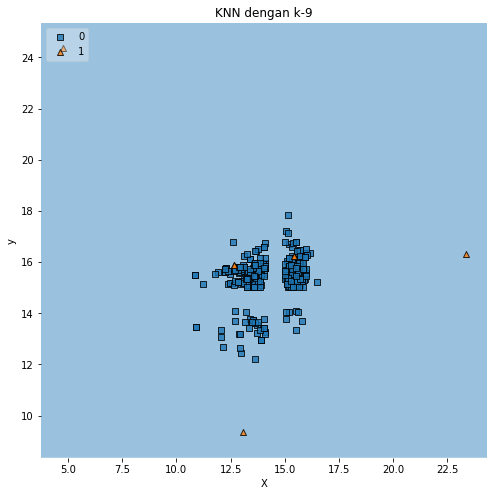

In [34]:
knn_builder(9)

### n_neighbours=10

Accuracy score with n-10: 93.83


C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


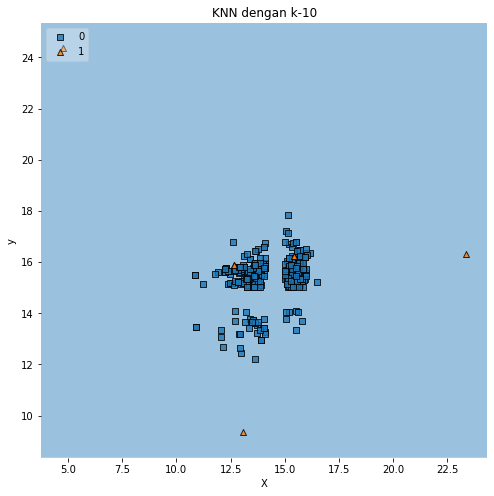

In [35]:
knn_builder(10)

## Model Comparison

In [36]:
accuracy_comparison

[95.06172839506173,
 95.06172839506173,
 93.82716049382715,
 93.82716049382715,
 93.82716049382715,
 93.82716049382715,
 93.82716049382715,
 93.82716049382715,
 93.82716049382715]

In [57]:
df_compare = pd.DataFrame(accuracy_comparison, index=pd.RangeIndex(start=2, stop=11))

<AxesSubplot:>

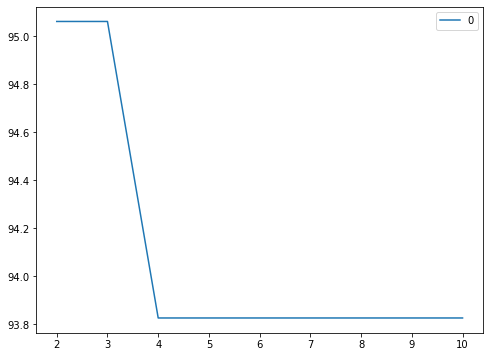

In [62]:
df_compare.plot(figsize=(8, 6))

## Conclusion

From the picture above, the best model to check the botnet is best when the n_neighbours in 2 and 3